
# This script contains the following points:

1.Personally Identifiable Information (PII) data

2.Geographic segmentation¶ (includes visualization)

3.Low-activity customer 

4.Customer profilling (includes visualization)

5.Distribution of customer profile (includes visualization)

6.Statistics on customer-profile level for order frequency and expenditures

7.Customer analysis by region (includes visualization)




### Importing libreries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path
path= '/Users/milivanili/Desktop/ Instacart Basket Analysis '

In [3]:
df_big=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_big.pkl'))

## 1. Consider any security implications that might exist for this new data.¶

In [4]:
#Check output 
df_big.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,frequency_flag,First Name,Surnam,Gender,State,Age,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both


In [5]:
#Checking shape#Check output 
df_big.shape

(32399732, 32)

In [6]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   order_day_of_week       int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  price_range_loc         object  
 14  Busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_spend           float64 
 20  spender_flag            object  
 21  Custom

### Consider any Security Implications for this Data

### The dataset contains sensitive personal information such as income, marital status, state of residence, and user ID. To protect the privacy of customers, we removed the columns that contained their first and last names, as this information wasn't necessary for the analysis. Instead, we can always use the user ID to identify customers for any follow-up analysis. It's important to note that these data have been artificially generated for the purpose of training in this course, and do not represent real individuals.


## 2. Create a regional segmentation of the data¶

Northeast region

In [7]:
#Creating new column region using loc function with mapping
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [8]:
#Create region
df_big.loc[df_big['State'].isin(northeast_states),'regions']= 'Northeast' 

Midwest region

In [9]:
#Creating new column region using loc function with mapping
midwest_states= [ 'Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [10]:
#Create region
df_big.loc[df_big['State'].isin(midwest_states),'regions']= 'Midwest' 

South region

In [11]:
#Creating new column region using loc function with mapping
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [12]:
#Create region
df_big.loc[df_big['State'].isin(south_states),'regions']= 'South' 

West region

In [13]:
#Creating new column region using loc function with mapping
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [14]:
#Create region
df_big.loc[df_big['State'].isin(west_states),'regions']= 'West'

In [15]:
# User count by region
df_big['regions'].value_counts(dropna = False)

regions
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [16]:
#Check output
df_big[['regions','State']].head()

,regions,State
0,Midwest,Minnesota
1,Midwest,Minnesota
2,Midwest,Minnesota
3,Midwest,Minnesota
4,Midwest,Minnesota


### Spending habbits by region

In [17]:
#Creating spending flag
df_big.loc[df_big['prices'] < 10, 'spending_flag'] = 'low spender'
df_big.loc[(df_big['prices'] >= 10) & (df_big['prices'] <= 25), 'spending_flag'] = 'high spender'

In [18]:
# Create a Crosstab of Region and Spending Flag
spending_by_region = pd.crosstab(df_big['regions'], df_big['spending_flag'], dropna = False)

In [19]:
#Checing output
spending_by_region

spending_flag,high spender,low spender
regions,,
Midwest,2495774,5100291
Northeast,1874326,3847566
South,3547836,7242260
West,2720859,5570820


In [20]:
#Creating total customers by region
total_customers = df_big['regions'].value_counts()

In [21]:
# Filter high spender and low spender categories to make two bar charts
high_spenders = df_big[df_big['spending_flag'] == 'high spender']
low_spenders = df_big[df_big['spending_flag'] == 'low spender']

In [22]:
total_customers

regions
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

### Defining High and Low Spender Counts

In [23]:
#Groupby and count high and low customers by regions
high_spenders_counts = high_spenders.groupby('regions').size()
low_spenders_counts = low_spenders.groupby('regions').size()

In [24]:
#Check output
high_spenders_counts.head()

regions
Midwest      2495774
Northeast    1874326
South        3547836
West         2720859
dtype: int64

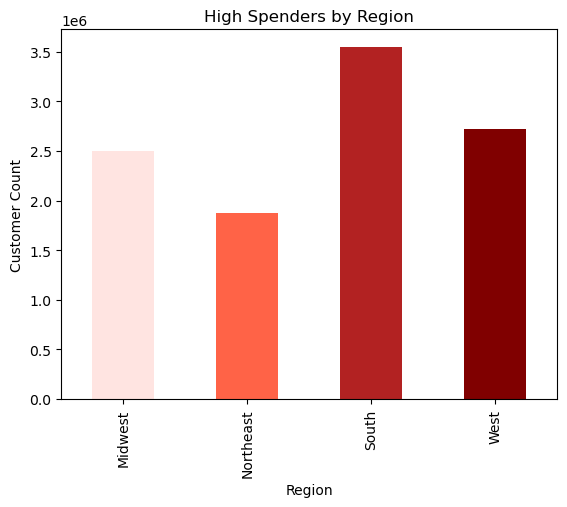

In [25]:
#Creating bar chart for high spenders
#Code for saving chart into object form
bar_regional_high_spenders = high_spenders_counts.plot.bar(color = ['mistyrose', 'tomato', 'firebrick', 'maroon'])
plt.title('High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()

# Code for Exporting Bar figure to file on computer

bar_regional_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_high_spenders.png'))

In [26]:
#Checking output
low_spenders_counts.head()

regions
Midwest      5100291
Northeast    3847566
South        7242260
West         5570820
dtype: int64

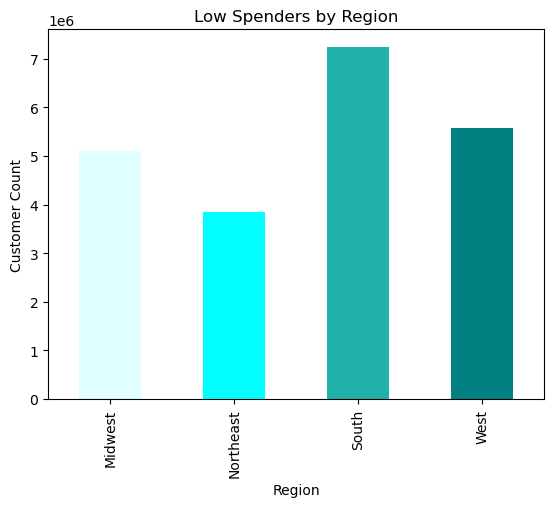

In [27]:
#Creating bar chart for low spenders
#Code for saving into object form
bar_regional_low_spenders = low_spenders_counts.plot.bar(color = ['lightcyan', 'aqua', 'lightseagreen', 'teal'])
plt.title('Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()

# Code for Exporting Bar figure to file on computer

bar_regional_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_low_spenders.png'))

######  Based on the data analysis, we found that the South region has both the largest number of customers who spend the least and the highest number of customers who spend the most. South region also has the highest number of states and customers overall. To gain a more accurate understanding of the ratio of low spenders and high spenders in each region, we need to calculate these ratios based on the total number of customers in each region, rather than just looking at the raw volume of customers.

### Creating ratios

In [28]:
# Creating a Total Regional Customers object in order to divide the low spenders and high spenders by this number.

total_customers = df_big['regions'].value_counts()

In [29]:
#Checking output
total_customers

regions
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [30]:
#Creating ratio for low spenders
low_spenders_counts / total_customers

regions
Midwest      0.671439
Northeast    0.672429
South        0.671195
West         0.671857
dtype: float64

In [31]:
# Creating rations for low spenders

low_spenders_ratio = (high_spenders_counts / total_customers)*100

In [32]:
# Convert results to percentages
(low_spenders_counts / total_customers)*100

regions
Midwest      67.143857
Northeast    67.242898
South        67.119514
West         67.185669
dtype: float64

##### Low Ratio for all 4 Regions is very similar
For the Midwest, 67.14% are low spenders.
For the Northeast, 67.24% are low spenders. 
For the South, 67.11% are low spenders.
For the West, 67.18% are low spenders. 

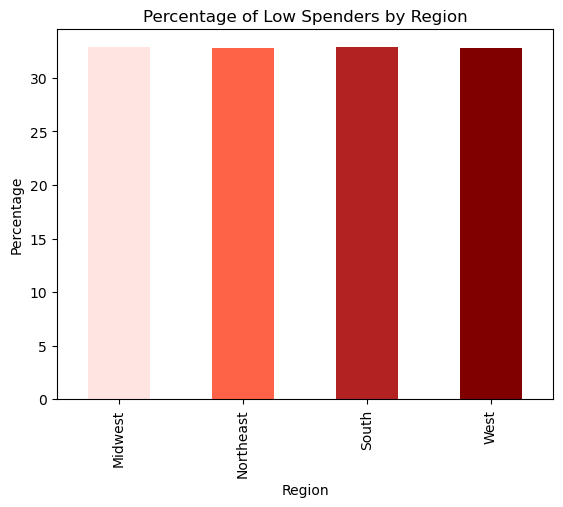

In [33]:
# Create Bar Chart
#Code for saving into object form
bar_low_spender_ratio=low_spenders_ratio.plot.bar(color = ['mistyrose', 'tomato', 'firebrick', 'maroon'])
plt.title('Percentage of Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

# Code for Exporting Bar figure to file on computer

bar_low_spender_ratio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_low_spender_ratio.png'))


### Repeting process for high spender ratio

In [34]:
#Creating ratio for high spenders
high_spenders_counts / total_customers

regions
Midwest      0.328561
Northeast    0.327571
South        0.328805
West         0.328143
dtype: float64

In [35]:
# Convert to Percentage and create High Spenders Ratio object

high_spenders_ratio = (high_spenders_counts / total_customers)*100

In [36]:
high_spenders_ratio

regions
Midwest      32.856143
Northeast    32.757102
South        32.880486
West         32.814331
dtype: float64

#### Similar to the low spenders ratio, there are miniscule differences between the high spenders ratio in each region. Midwest 32.856143 Northeast 32.757102 South 32.880486 West 32.814331

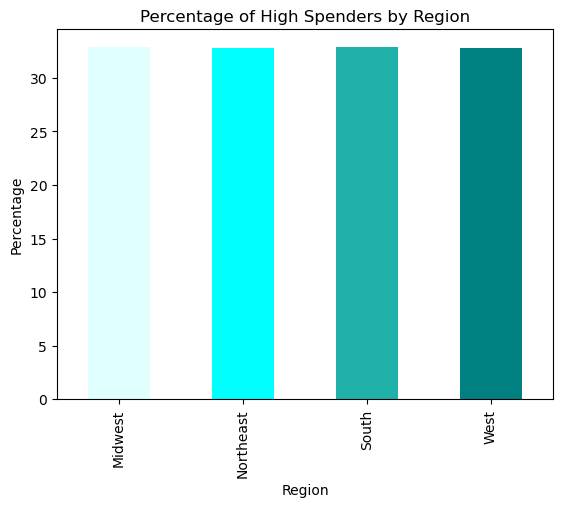

In [37]:
# Code for saving into object form

bar_high_spenders_ratio=high_spenders_ratio.plot.bar(color = ['lightcyan', 'aqua','lightseagreen',  'teal'])
plt.title('Percentage of High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

bar_high_spenders_ratio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_spenders_ratio.png'))

## 3. Low-activity customers

In [38]:
# Define low_activity customers
df_big.loc[df_big['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers
df_big.loc[df_big['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [39]:
# User count base on activity level
df_big['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24411166
low_activity customers     7988566
Name: count, dtype: int64

In [40]:
#Checking Shape
df_big.shape

(32399732, 35)

In [41]:
# Filter customers with less than 5 orders from the data
df_big['low_activity_flag'] = df_big['max_order'] < 5
low_activ_customers = df_big[~df_big['low_activity_flag']]

In [42]:
# Filter customers with less than 5 orders from the data
df_big['low_activity_flag'] = df_big['max_order'] < 5
low_activ_customers = df_big[~df_big['low_activity_flag']]

In [43]:
#Checking shape
low_activ_customers.shape

(30959687, 36)

In [44]:
# Fixing formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [45]:
low_activ_customers['max_order'].describe()

count   30959687.00
mean          34.43
std           24.90
min            5.00
25%           14.00
50%           28.00
75%           48.00
max           99.00
Name: max_order, dtype: float64

#### Create sample

In [46]:
# Now Create a Sample of the low activity customers

low_activity_sample= df_big[df_big['low_activity_flag']]

In [47]:
#Checking output
low_activity_sample.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,State,Age,dependants,family_status,income,_merge,regions,spending_flag,customer_activity,low_activity_flag
340,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,...,Wisconsin,40,3,married,31308,both,Midwest,low spender,low_activity customers,True
341,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,...,Wisconsin,40,3,married,31308,both,Midwest,low spender,low_activity customers,True
342,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.70,652770,764,1,3,13,...,Wisconsin,40,3,married,31308,both,Midwest,low spender,low_activity customers,True
343,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.70,705212,764,2,2,10,...,Wisconsin,40,3,married,31308,both,Midwest,low spender,low_activity customers,True
344,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,61,19,1.70,1813452,764,3,4,17,...,Wisconsin,40,3,married,31308,both,Midwest,low spender,low_activity customers,True


In [48]:
# Shape Check and Description Check to verify max_order is less than 5

low_activity_sample.shape

(1440045, 36)

In [49]:
#Checking Statistics
low_activity_sample['max_order'].describe()

count   1440045.00
mean          3.52
std           0.50
min           1.00
25%           3.00
50%           4.00
75%           4.00
max           4.00
Name: max_order, dtype: float64

#### I have identified 1,440,045 Customers with less than 5 orders using the exclusion flag. These customers have been excluded from the data and a sample of the low activity data will be stored separately and excluded from the analysis.

## 4 Define income , age,  family status, dependants groups

In [50]:
#Checking output and shape
df_big.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_spend,Customer_frequency,Age,dependants,income
count,32399732.00,32399732.00,32399732.00,32399732.00,32399732.00,32399732.00,32399732.00,32399732.00,32399732.00,30323987.00,32399732.00,32399732.00,32399732.00,32399732.00,32399727.00,32399732.00,32399732.00,32399732.00
mean,25599.04,71.19,9.92,7.79,1710745.79,102936.73,17.14,2.74,13.43,11.10,8.35,0.59,33.05,7.79,10.40,49.47,1.50,99416.85
std,14084.98,38.21,6.28,4.24,987299.39,59466.23,17.54,2.09,4.25,8.78,7.13,0.49,25.16,0.73,7.13,18.49,1.12,43006.69
min,1.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,18.00,0.00,25903.00
25%,13541.00,31.00,4.00,4.20,855945.00,51420.00,5.00,1.00,10.00,5.00,3.00,0.00,13.00,7.38,6.00,33.00,1.00,66996.00
50%,25305.00,83.00,9.00,7.40,1711052.00,102614.00,11.00,3.00,13.00,8.00,6.00,1.00,26.00,7.81,8.00,49.00,2.00,96608.00
75%,37947.00,107.00,16.00,11.30,2565499.00,154388.00,24.00,5.00,16.00,15.00,11.00,1.00,47.00,8.23,13.00,65.00,3.00,127884.00
max,49688.00,134.00,21.00,25.00,3421083.00,206209.00,99.00,6.00,23.00,30.00,145.00,1.00,99.00,23.20,30.00,81.00,3.00,593901.00


In [51]:
#Checking shape
df_big.shape

(32399732, 36)

In [52]:
# Seting the income thresholds for low and high income
low_income_threshold = 55000
high_income_threshold = 120000

In [53]:
# Creating customer profile by income column
df_big['income_profile'] = pd.cut(
    df_big['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['low income', 'middle income', 'high income'],
    include_lowest=True)

In [54]:
df_big['income_profile'].value_counts()

income_profile
middle income    18093095
high income       9566652
low income        4739985
Name: count, dtype: int64

In [55]:
# Creating crosstab Familiy status count by income profile
fam_status= pd.crosstab(df_big['income_profile'], df_big['family_status'], dropna = False)

In [62]:
fam_status

family_status,divorced/widowed,living with parents and siblings,married,single
income_profile,,,,
low income,264884,357531,3197692,919878
middle income,1241439,1174657,12424641,3252358
high income,1265032,18214,7130722,1152684


In [56]:
# Converting data-type to string
df_big['dependants'] = df_big['dependants'].astype(int)

In [57]:
# create 'dependants_flag' column based on 'no_of_dependants' 

df_big.loc[df_big['dependants']==0,'dependants_flag']="No dependants"

In [58]:
df_big.loc[df_big['dependants']>0,'dependants_flag']="Have dependants"

In [59]:
df_big['dependants_flag'].value_counts(dropna=False)

dependants_flag
Have dependants    24303457
No dependants       8096275
Name: count, dtype: int64

In [60]:
# Converting data-type to string
df_big['dependants_flag'] = df_big['dependants_flag'].astype(str)

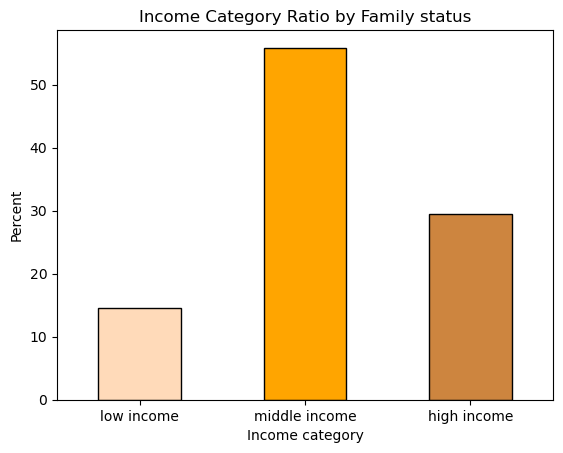

<Figure size 640x480 with 0 Axes>

In [61]:
#Creating Bar Chart for income category
income_category_frequency = (df_big['income_profile'].value_counts(normalize=True) * 100).sort_index()
income_category_frequency.plot.bar(edgecolor = 'black',color=['peachpuff', 'orange', 'peru'])
plt.xlabel('Income category')
plt.ylabel('Percent')
plt.title('Income Category Ratio by Family status')
plt.xticks(rotation=0)
plt.show()
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_category_frequency_bar.png'))

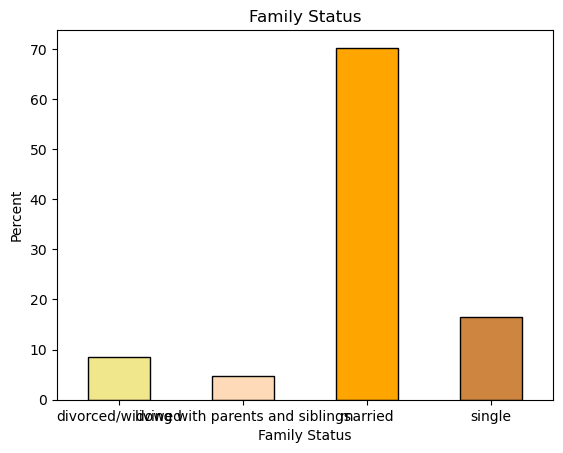

<Figure size 640x480 with 0 Axes>

In [62]:
#Creating Bar Chart for Family status category
family_status = (df_big['family_status'].value_counts(normalize=True) * 100).sort_index()
family_status.plot.bar(edgecolor = 'black',color=['khaki','peachpuff', 'orange', 'peru','brown',])
plt.xlabel('Family Status')
plt.ylabel('Percent')
plt.title('Family Status')
plt.xticks(rotation=0)
plt.show()
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_bar.png'))

### Create Age Category

In [63]:
# Create the age_group column with value as 'Unknown'
df_big['age_category'] = 'Unknown'

In [64]:
#Creating age group customer profil
df_big.loc[(df_big['Age'] >= 18) & (df_big['Age'] <= 28), 'age_category'] = 'young adult'
df_big.loc[(df_big['Age'] >= 29) & (df_big['Age'] <= 40), 'age_category'] = 'adult'
df_big.loc[(df_big['Age'] >= 41) & (df_big['Age'] <= 55), 'age_category'] = 'middle-aged'
df_big.loc[(df_big['Age'] >= 56) & (df_big['Age'] <= 70), 'age_category'] = 'senior'
df_big.loc[(df_big['Age'] >= 71) & (df_big['Age'] <= 81), 'age_category'] = 'elderly'

In [65]:
# Familiy status count by customer profile
age_income = pd.crosstab(df_big['income_profile'], df_big['age_category'], dropna = False)

In [66]:
age_income

age_category,adult,elderly,middle-aged,senior,young adult
income_profile,,,,,
low income,1396400,553566,786269,736409,1267341
middle income,4628936,2498330,3372595,3355362,4237872
high income,73633,2525397,3482611,3420984,64027


In [67]:
#Creating bar chart for age group customer profile 
# Checking output
df_big['age_category'].value_counts()

age_category
middle-aged    7641475
senior         7512755
adult          6098969
elderly        5577293
young adult    5569240
Name: count, dtype: int64

In [68]:
# Creating Percentage for age category
age_category_percent = (df_big['age_category'].value_counts(normalize=True) * 100).sort_index()

In [69]:
age_category_percent

age_category
adult         18.82
elderly       17.21
middle-aged   23.58
senior        23.19
young adult   17.19
Name: proportion, dtype: float64

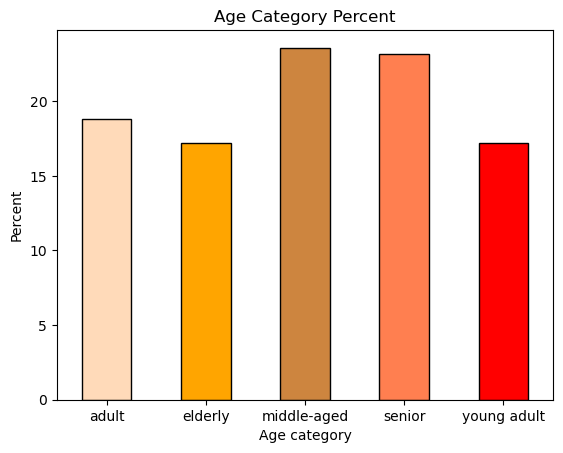

<Figure size 640x480 with 0 Axes>

In [70]:


#Creating Bar Chart for age category
age_category_percent = (df_big['age_category'].value_counts(normalize=True) * 100).sort_index()
age_category_percent.plot.bar(edgecolor = 'black',color=['peachpuff', 'orange', 'peru','coral','red'])
plt.xlabel('Age category')
plt.ylabel('Percent')
plt.title('Age Category Percent')
plt.xticks(rotation=0)
plt.show()
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_category_percent_bar.png'))

In [76]:
# Creating Percentage
dependants_percent = (df_big['dependants'].value_counts(normalize=True) * 100).sort_index()

In [77]:
dependants_percent

dependants
0   24.99
1   24.94
2   24.97
3   25.10
Name: proportion, dtype: float64

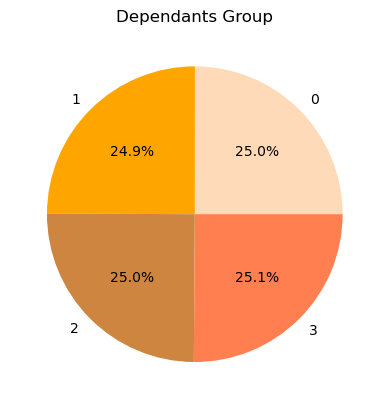

In [78]:
# Create Pie Chart  for dependants presentage
dependants_pie = plt.pie(dependants_percent, labels=dependants_percent.index, autopct='%1.1f%%',  colors=['peachpuff', 'orange', 'peru','coral'])
plt.title('Dependants Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_pie.png'))


In [72]:
# Converting data-type to string
df_big['income_profile'] = df_big['income_profile'].astype(str)

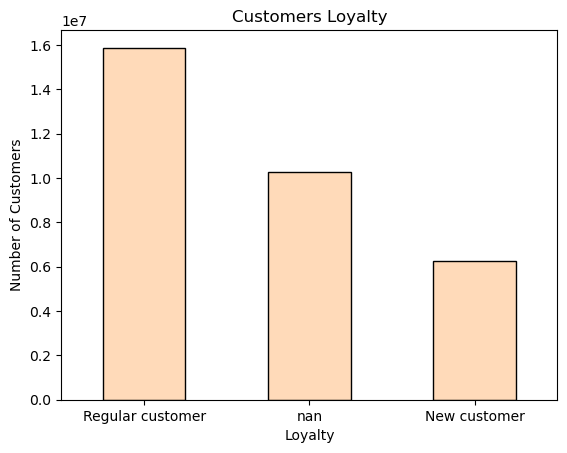

In [73]:

# Creating a bar chart for the loyaltiy and number of orders
bar_orders_loyalty = df_big['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', edgecolor = 'black', color = 'peachpuff',)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))


### Creating customer profiles

In [74]:
# Creating new column customer_profile 
df_big['customer_profile'] = df_big['age_category'] + ', ' + df_big['income_profile']+','+df_big['dependants_flag']

In [75]:
#Checking output
df_big['customer_profile'].head()

0    elderly, low income,Have dependants
1    elderly, low income,Have dependants
2    elderly, low income,Have dependants
3    elderly, low income,Have dependants
4    elderly, low income,Have dependants
Name: customer_profile, dtype: object

In [76]:
#Checking Shape
df_big.shape

(32399732, 40)

### Creating Busiest day of week Histogram

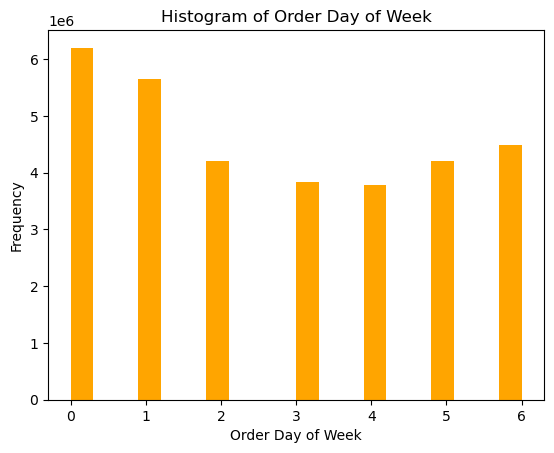

In [77]:
# Viz of the busiest day of week for order
busiest_day_of_week = df_big['order_day_of_week'].plot.hist(bins = 20, color = 'orange')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Histogram of Order Day of Week') # Chart title

# Saving as PNG
busiest_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_day_of_week.png'))

### Crating busiest hour of the day

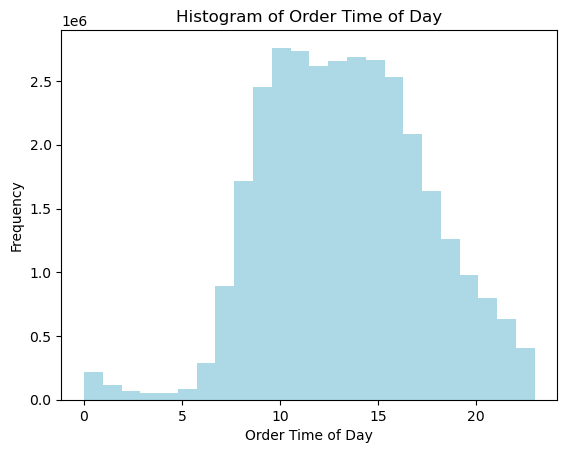

In [78]:
# Viz of the busiest hour of day for order
busiest_hour_of_day = df_big['order_hour_of_day'].plot.hist(bins = 24, color = 'lightblue')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Histogram of Order Time of Day')  # Title of the bar chart

# Saving as PNG
busiest_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hour_of_day.png'))

In [86]:
df_big.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,family_status,income,_merge,regions,spending_flag,customer_activity,low_activity_flag,income_profile,age_category,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,...,married,49620,both,Midwest,low spender,high_activity customer,False,low income,elderly,"elderly, low income"
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,...,married,49620,both,Midwest,low spender,high_activity customer,False,low income,elderly,"elderly, low income"
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,1,5,13,...,married,49620,both,Midwest,high spender,low_activity customers,False,low income,elderly,"elderly, low income"
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,10,5,14,...,married,49620,both,Midwest,high spender,high_activity customer,False,low income,elderly,"elderly, low income"
4,1000,Apricots,18,10,12.90,505689,138,9,6,12,...,married,49620,both,Midwest,high spender,high_activity customer,False,low income,elderly,"elderly, low income"


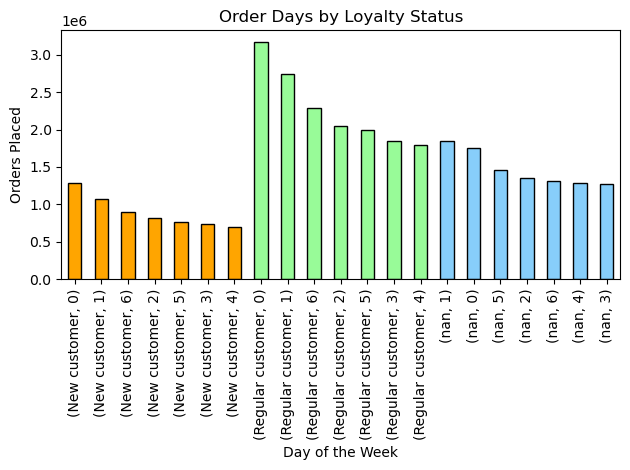

In [79]:
#Creating customers daily orders placed
loyalty_day_order_bar = df_big.groupby('loyalty_flag')['order_day_of_week'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week', ylabel = 'Orders Placed', edgecolor = 'black', color=['orange'] * 7 + ['palegreen'] * 7 + ['lightskyblue'] * 7)
plt.tight_layout()

# Saving as PNG
loyalty_day_order_bar .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_day_order_bar .png'))

Nan are indentified as  Loyal Customers in visualization

# 5.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.¶



In [80]:
# Order frequency by customer profile
freqt_customer_order = df_big.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','std','max']})
freqt_customer_order

days_since_prior_order            \
                                                             mean  min  std   
customer_profile                                                              
adult, high income,Have dependants                          10.69 0.00 8.78   
adult, high income,No dependants                            10.02 0.00 7.95   
adult, low income,Have dependants                           11.51 0.00 8.88   
adult, low income,No dependants                             11.59 0.00 8.98   
adult, middle income,Have dependants                        10.98 0.00 8.71   
adult, middle income,No dependants                          11.00 0.00 8.69   
elderly, high income,Have dependants                        11.01 0.00 8.72   
elderly, high income,No dependants                          10.95 0.00 8.78   
elderly, low income,Have dependants                         11.32 0.00 8.87   
elderly, low income,No dependants                           11.81 0.00 9.05   
elderly, middle income,Have dependants                      11.11 0.00 8.79   
elderly, middle income,No dependants                        11.07 0.00 8.73   
middle-aged, high income,Have dependants                    11.07 0.00 8.76   
middle-aged, high income,No dependants                      11.01 0.00 8.73   
middle-aged, low income,Have dependants                     11.64 0.00 9.05   
middle-aged, low income,No dependants                       11.18 0.00 8.89   
middle-aged, middle income,Have dependants                  11.04 0.00 8.75   
middle-aged, middle income,No dependants                    11.10 0.00 8.79   
senior, high income,Have dependants                         11.13 0.00 8.80   
senior, high income,No dependants                           10.83 0.00 8.75   
senior, low income,Have dependants                          11.89 0.00 9.13   
senior, low income,No dependants                            11.61 0.00 9.10   
senior, middle income,Have dependants                       11.05 0.00 8.77   
senior, middle income,No dependants                         10.89 0.00 8.68   
young adult, high income,Have dependants                    10.13 0.00 8.43   
young adult, high income,No dependants                      10.70 0.00 8.66   
young adult, low income,Have dependants                     11.40 0.00 8.89   
young adult, low income,No dependants                       11.35 0.00 8.91   
young adult, middle income,Have dependants                  10.99 0.00 8.72   
young adult, middle income,No dependants                    11.22 0.00 8.79   

                                                  
                                             max  
customer_profile                                  
adult, high income,Have dependants         30.00  
adult, high income,No dependants           30.00  
adult, low income,Have dependants          30.00  
adult, low income,No dependants            30.00  
adult, middle income,Have dependants       30.00  
adult, middle income,No dependants         30.00  
elderly, high income,Have dependants       30.00  
elderly, high income,No dependants         30.00  
elderly, low income,Have dependants        30.00  
elderly, low income,No dependants          30.00  
elderly, middle income,Have dependants     30.00  
elderly, middle income,No dependants       30.00  
middle-aged, high income,Have dependants   30.00  
middle-aged, high income,No dependants     30.00  
middle-aged, low income,Have dependants    30.00  
middle-aged, low income,No dependants      30.00  
middle-aged, middle income,Have dependants 30.00  
middle-aged, middle income,No dependants   30.00  
senior, high income,Have dependants        30.00  
senior, high income,No dependants          30.00  
senior, low income,Have dependants         30.00  
senior, low income,No dependants           30.00  
senior, middle income,Have dependants      30.00  
senior, middle income,No dependants        30.00  
young adult, high income,Have dependants   30.00  
young a

In [81]:
# Average frequency by customer
freqt_customer_average = df_big.groupby('customer_profile').agg({'average_spend': ['mean','min','std','max']})
freqt_customer_average

average_spend                
                                                    mean  min  std   max
customer_profile                                                        
adult, high income,Have dependants                  7.83 5.16 0.66  9.79
adult, high income,No dependants                    7.81 6.37 0.56  9.41
adult, low income,Have dependants                   7.23 1.00 0.91 14.42
adult, low income,No dependants                     7.23 1.80 0.89 11.70
adult, middle income,Have dependants                7.96 6.04 0.57 18.23
adult, middle income,No dependants                  7.96 5.38 0.56 13.76
elderly, high income,Have dependants                7.96 4.43 0.57 16.03
elderly, high income,No dependants                  7.97 6.30 0.58 13.96
elderly, low income,Have dependants                 6.51 1.00 0.53  7.00
elderly, low income,No dependants                   6.48 1.40 0.56  7.00
elderly, middle income,Have dependants              7.91 2.28 0.63 17.62
elderly, middle income,No dependants                7.91 1.20 0.63 14.14
middle-aged, high income,Have dependants            7.96 4.99 0.57 20.11
middle-aged, high income,No dependants              7.95 5.79 0.59 15.80
middle-aged, low income,Have dependants             6.50 1.10 0.53  7.00
middle-aged, low income,No dependants               6.49 1.00 0.55  7.00
middle-aged, middle income,Have dependants          7.92 2.15 0.63 16.14
middle-aged, middle income,No dependants            7.92 2.65 0.64 13.40
senior, high income,Have dependants                 7.96 5.80 0.57 15.89
senior, high income,No dependants                   7.94 4.37 0.56 20.00
senior, low income,Have dependants                  6.49 1.10 0.53  7.00
senior, low income,No dependants                    6.54 1.50 0.51  7.00
senior, middle income,Have dependants               7.91 1.30 0.63 23.20
senior, middle income,No dependants                 7.93 1.31 0.64 12.60
young adult, high income,Have dependants            7.83 4.66 0.61  9.81
young adult, high income,No dependants              7.79 5.85 0.56  9.93
young adult, low income,Have dependants             7.22 1.10 0.92 13.10
young adult, low income,No dependants               7.19 1.00 0.92 13.88
young adult, middle income,Have dependants          7.96 5.28 0.57 16.67
young adult, middle income,No dependants            7.95 6.93 0.56 16.70

## 7.Top performing Departments

In [82]:
# Maping deparment id to names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [83]:
# Create the department name column
df_big['department_name'] =df_big['department_id'].map(department_mapping).fillna('missing')

In [84]:
# Department counts by income class
popular_dep_cust = pd.crosstab(df_big['department_name'], df_big['customer_profile'], dropna = False)

In [85]:
df_big['department_name'].value_counts(dropna =  False ).sort_values(ascending = False)

department_name
produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [87]:
# Define Departments with a dictionary

department_dictionary = {
                            1: 'frozen',
                            2: 'other',
                            3: 'bakery',
                            4: 'produce',
                            5: 'alcohol',
                            6: 'international',
                            7: 'beverages',
                            8: 'pets',
                            9: 'dry goods pasta',
                            10: 'bulk',
                            11: 'personal care',
                            12: 'meat seafood',
                            13: 'pantry',
                            14: 'breakfast',
                            15: 'canned goods',
                            16: 'dairy eggs',
                            17: 'household',
                            18: 'babies',
                            19: 'snacks',
                            20: 'deli',
                                                    }# Form the department name column and be sure to account for any missing values

df_big['department_name'] = df_big['department_id'].map(department_dictionary).fillna("missing")

In [88]:
df_big['department_name'].value_counts()

department_name
produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

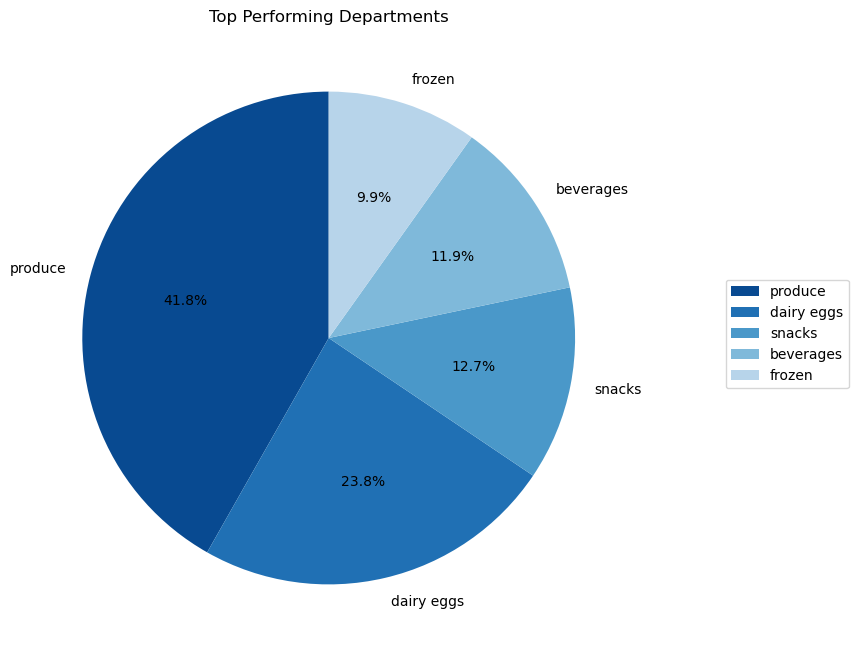

In [89]:
# Calculate the counts of each department
department_counts = df_big['department_name'].value_counts()

# Identify the top 5 departments
top_departments = department_counts.head(5).index

# Group other departments into "Other"
df_big['department_grouped'] =df_big['department_name'].where(df_big['department_name'].isin(top_departments))

# Calculate the percentage of each department group
department_percentage = df_big['department_grouped'].value_counts(normalize=True) * 100

# Define shades of blue
shades_of_blue = plt.cm.Blues(np.linspace(0.9, 0.3, len(department_percentage)))

# Create a pie chart with shades of blue
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=shades_of_blue)

# Add a legend with shades of red
ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)

# Set the title
plt.title('Top Performing Departments', )

# Save the figure as an image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)

# Display the pie chart
plt.show()

In [90]:
# Department counts by income class
popular_dep_cust = pd.crosstab(df_big['department_name'], df_big['customer_profile'], dropna = False)

In [95]:
popular_dep_cust

customer_profile,"adult, high income,Have dependants","adult, high income,No dependants","adult, low income,Have dependants","adult, low income,No dependants","adult, middle income,Have dependants","adult, middle income,No dependants","elderly, high income,Have dependants","elderly, high income,No dependants","elderly, low income,Have dependants","elderly, low income,No dependants",...,"senior, low income,Have dependants","senior, low income,No dependants","senior, middle income,Have dependants","senior, middle income,No dependants","young adult, high income,Have dependants","young adult, high income,No dependants","young adult, low income,Have dependants","young adult, low income,No dependants","young adult, middle income,Have dependants","young adult, middle income,No dependants"
department_name,,,,,,,,,,,,,,,,,,,,,
alcohol,1122,580,5734,1751,15159,5362,8756,3144,2007,650,...,3443,1051,11465,3310,1556,276,4421,1469,15208,4605
babies,379,90,11864,3712,47147,15542,27634,7854,2867,1016,...,4387,1039,34643,11741,730,105,10402,4081,43370,15341
bakery,2819,819,35295,11790,126036,43055,69942,23394,13175,3855,...,16232,5979,90884,29503,2370,793,31723,11106,117501,38135
beverages,4800,1488,99798,35071,268184,91043,150872,50565,51405,14978,...,66412,22542,199419,65154,4470,1300,93634,31450,244097,81921
breakfast,1297,363,25752,8761,70711,23517,40505,12616,12956,3638,...,14752,4995,51906,18066,1366,361,23257,7914,68844,21660
bulk,16,0,1259,453,3611,1130,1840,534,698,96,...,791,262,2640,720,3,3,1076,367,3583,1007
canned goods,2149,738,30410,10415,117467,39555,64357,20943,9669,2833,...,11813,4410,84990,28014,1946,476,27083,9126,110989,35869
dairy eggs,9869,2769,161448,56607,591902,197766,320857,105040,62449,19310,...,76678,27753,420459,141993,8436,2110,149402,51596,544753,174122
deli,1319,467,33328,11674,112959,38198,61387,20568,12541,3622,...,16853,6480,81824,26739,1380,432,31228,10260,102975,34078


In [99]:
df = df_big[df_big['prices'] < 25]

In [100]:
df_big['prices'].describe()

count   32399732.00
mean           7.79
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

In [101]:
#Creating price range
df_big.loc[df_big['prices'] > 15, 'price_range'] = 'High-range product'
df_big.loc[df_big['prices'] <= 15 & (df_big['prices'] >5 ), 'price_range'] = 'Mid-range product'
df_big.loc[df_big['prices'] <= 5, 'price_range'] = 'Low-range product'

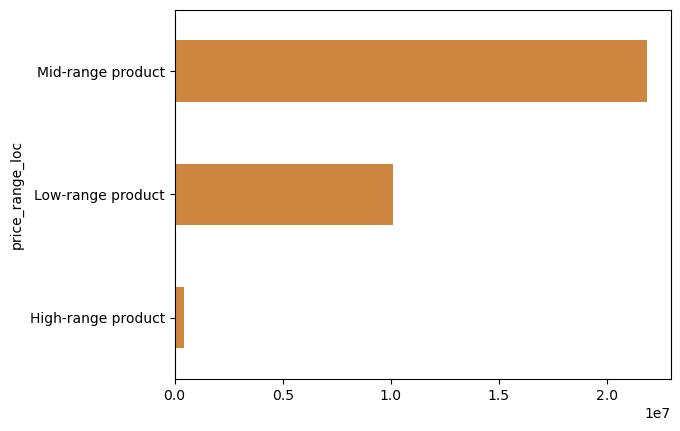

In [102]:
#Price range distributiom 
price_range_bar=df_big['price_range_loc'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['peru'])

# Saving as PNG
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar .png'))

In [103]:
# Grouping department name and loyalty flag
price_frequency = df_big.groupby(['prices', 'price_range_loc']).size().unstack()

In [104]:
 # Sorting values
price_frequency = price_frequency.sort_values(by = 'prices', ascending = False)

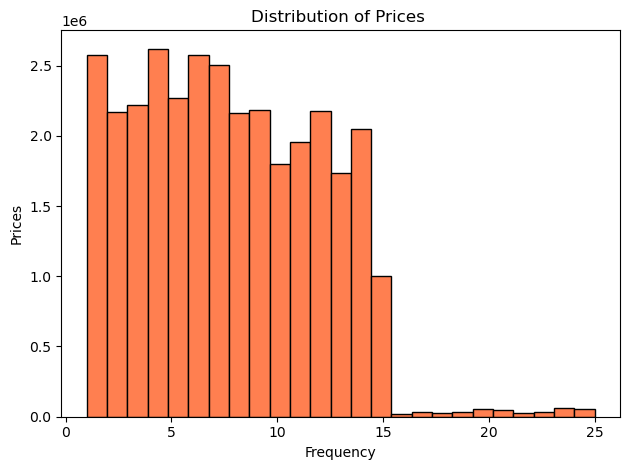

<Figure size 640x480 with 0 Axes>

In [105]:
#Create function to sort bar chart.sort_index()


df_big['prices'].plot.hist(bins =25, edgecolor = 'black', color = 'coral')
plt.title('Distribution of Prices ')
plt.xlabel('Frequency')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()



plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_of_prices.png')) # Save figure

In [106]:
# Grouping department name and loyalty flag
loyal_dept_group = df_big.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [107]:
loyal_dept_group # Sorting values
loyal_dept_group = loyal_dept_group.sort_values(by = 'Regular customer', ascending = False)

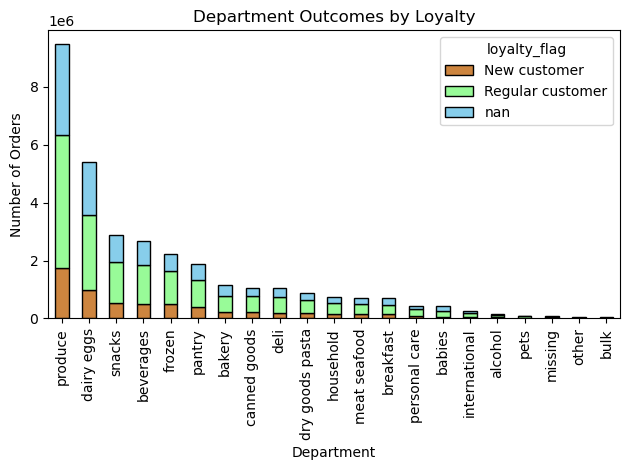

In [108]:
# Creating bar chart
colors = ['peru', 'palegreen','skyblue']
loyal_dept_group_bar = loyal_dept_group.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department Outcomes by Loyalty')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Saving as PNG
loyal_dept_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dept_group_bar .png'))

In [109]:
# Grouping department name and loyalty flag
dept_by_region = df_big.groupby(['department_name', 'regions']).size().unstack()

In [110]:
# Sorting values
dept_by_region = dept_by_region.sort_values(by = 'West', ascending = False)

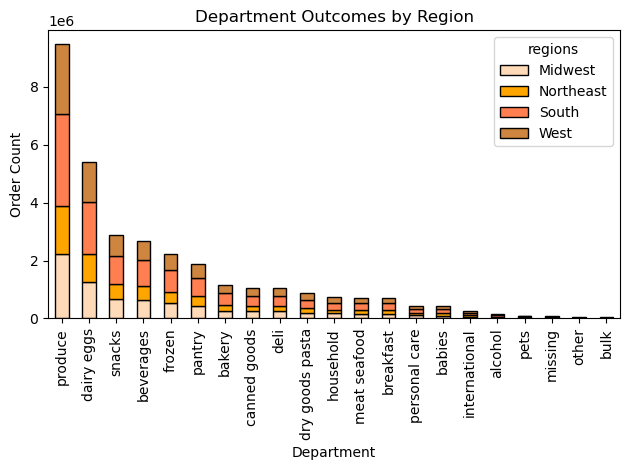

In [111]:
# Creating bar chart
colors = ['peachpuff', 'orange', 'coral','peru']
dept_by_region_bar = dept_by_region.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department Outcomes by Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

# Saving as PNG
dept_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_by_region_bar .png'))

In [112]:
# Creating crosstab
sum_price_by_region = pd.crosstab(index=df_big['regions'], columns='Sum Price', values=df_big['prices'], aggfunc='sum')

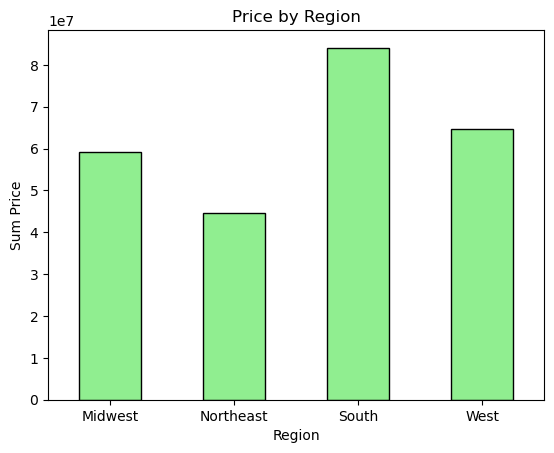

In [113]:
# Creating bar chart
sum_price_by_region_bar = sum_price_by_region.plot(kind='bar', edgecolor = 'black', color='lightgreen', legend=None)
plt.title('Price by Region')
plt.xlabel('Region')
plt.ylabel('Sum Price')
plt.xticks(rotation=0)
plt.show

# Saving as PNG
sum_price_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sum_price_by_region_bar.png'))

Text(0, 0.5, ' ')

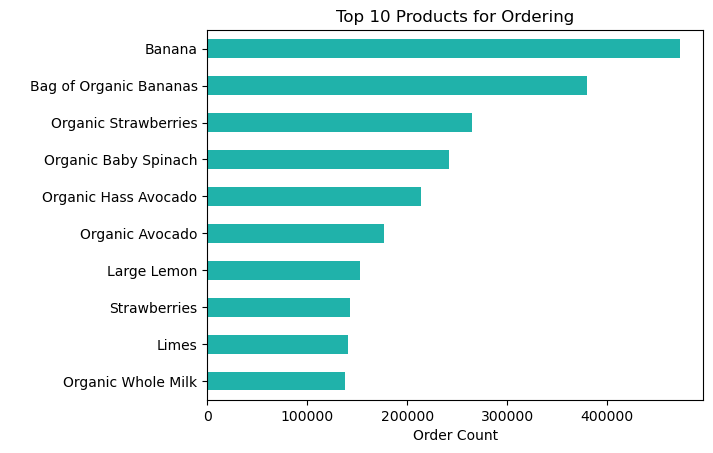

In [114]:
#Finding most popular products
favorite_prod=df_big['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['lightseagreen'])

plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0')])

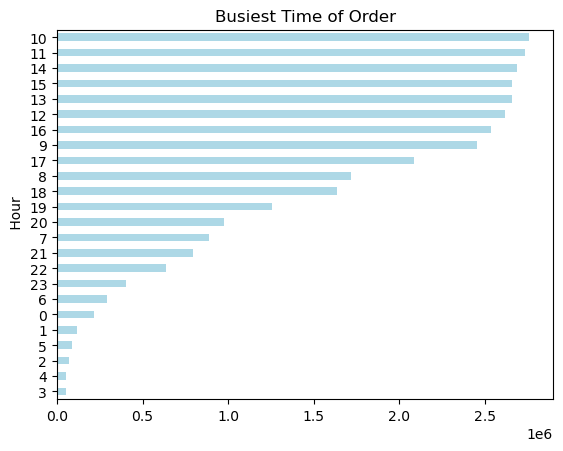

In [115]:
#Finding most popular products
time_of_day=df_big['order_hour_of_day'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['lightblue'])

plt.title('Busiest Time of Order') # Chart title
plt.xlabel('')  # Label for the x-axis
plt.ylabel(' Hour')  # Label for the y-axis
plt.xticks(rotation=0)

In [116]:
df_big.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,spending_flag,customer_activity,low_activity_flag,income_profile,dependants_flag,age_category,customer_profile,department_name,department_grouped,price_range
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,...,low spender,high_activity customer,False,low income,Have dependants,elderly,"elderly, low income,Have dependants",snacks,snacks,nan
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,...,low spender,high_activity customer,False,low income,Have dependants,elderly,"elderly, low income,Have dependants",snacks,snacks,nan
2,907,Premium Sliced Bacon,106,12,20.00,3160996,138,1,5,13,...,high spender,low_activity customers,False,low income,Have dependants,elderly,"elderly, low income,Have dependants",meat seafood,NaN,High-range product
3,907,Premium Sliced Bacon,106,12,20.00,2254091,138,10,5,14,...,high spender,high_activity customer,False,low income,Have dependants,elderly,"elderly, low income,Have dependants",meat seafood,NaN,High-range product
4,1000,Apricots,18,10,12.90,505689,138,9,6,12,...,high spender,high_activity customer,False,low income,Have dependants,elderly,"elderly, low income,Have dependants",bulk,NaN,nan


In [117]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 43 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   order_day_of_week       int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  price_range_loc         object  
 14  Busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_spend           float64 
 20  spender_flag            object  
 21  Custom

In [118]:
# Create a subset to analyze customer ordering habbits.
customer_habbits = df_big[['user_id','prices','regions','Age','age_category','income','order_hour_of_day','days_since_prior_order','order_day_of_week','product_name','family_status','loyalty_flag','frequency_flag','max_order','spending_flag','customer_activity']]

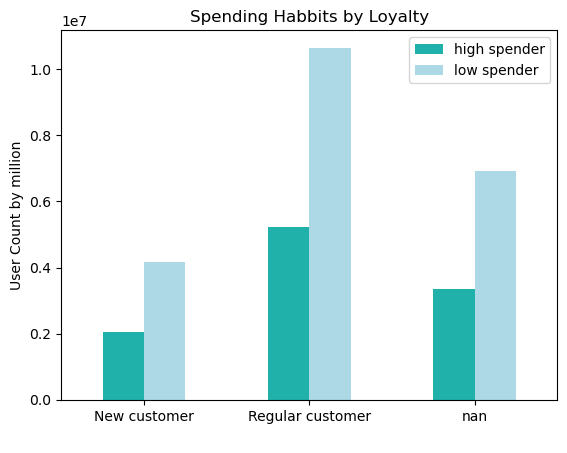

In [119]:
# Group spending flag by loyalty flag
grouped_counts = customer_habbits.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['lightseagreen','lightblue'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png')) # Save figure

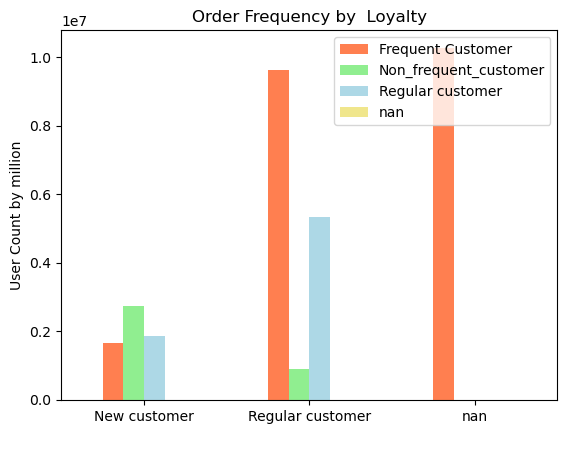

In [120]:
# Group frequency flag by loyalty flag
grouped_counts = customer_habbits.groupby(['loyalty_flag', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['coral', 'lightgreen', 'lightblue','khaki'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by  Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_freqt.png')) # Save figure

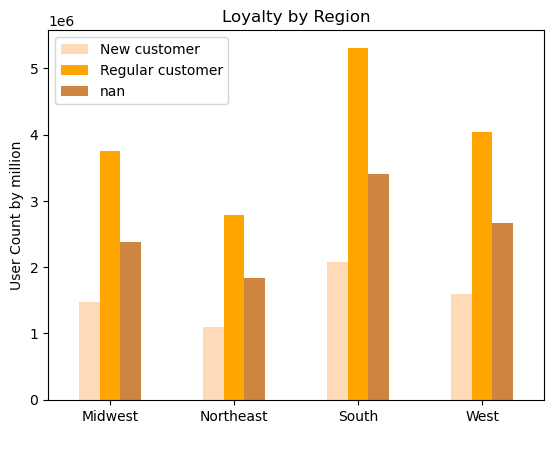

In [121]:
# Group loyalty flag by region
grouped_counts = customer_habbits.groupby(['regions', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['peachpuff', 'orange', 'peru','coral'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Loyalty by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loy.png')) # Save figure

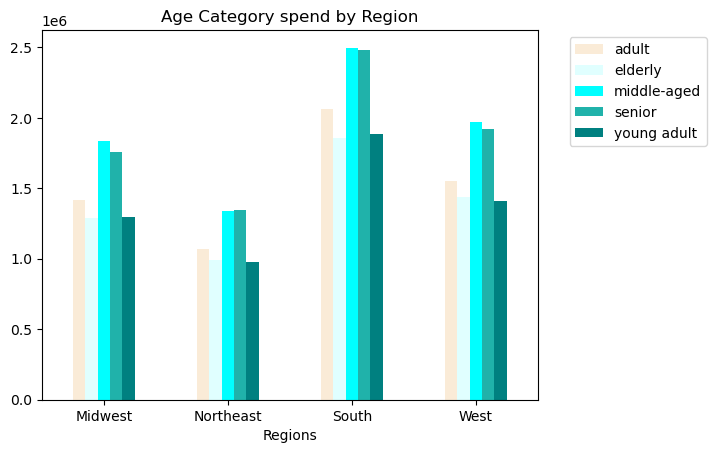

In [122]:
# Group customer profile by department id
grouped_counts = customer_habbits.groupby(['regions', 'age_category']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='bar',color = [
      'antiquewhite','lightcyan', 'aqua', 'lightseagreen', 'teal'])

# Add label and title
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Regions')
plt.title('Age Category spend by Region')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prod_cust.png')) # Save figure

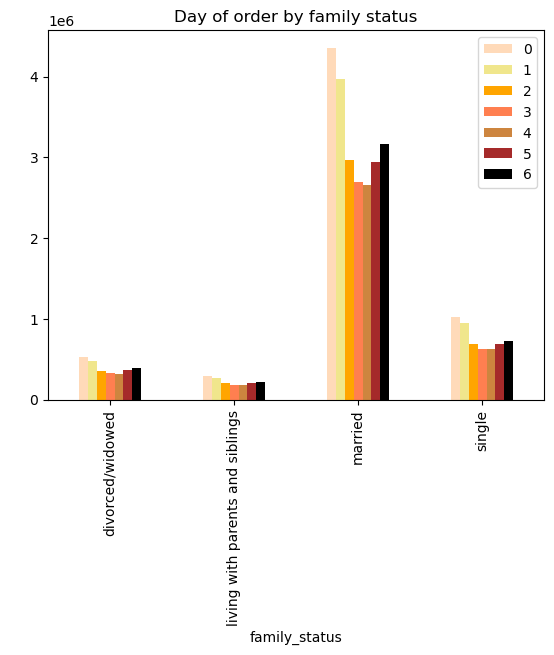

In [123]:
# Group customer activity order by customer profile
grouped_counts = customer_habbits.groupby(['family_status', 'order_day_of_week']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='bar', color = ['peachpuff','khaki', 'orange', 'coral','peru','brown','black'])

# Add labels and title
plt.ylabel(' ')
plt.title('Day of order by family status')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_by_fam.png')) # Save figure

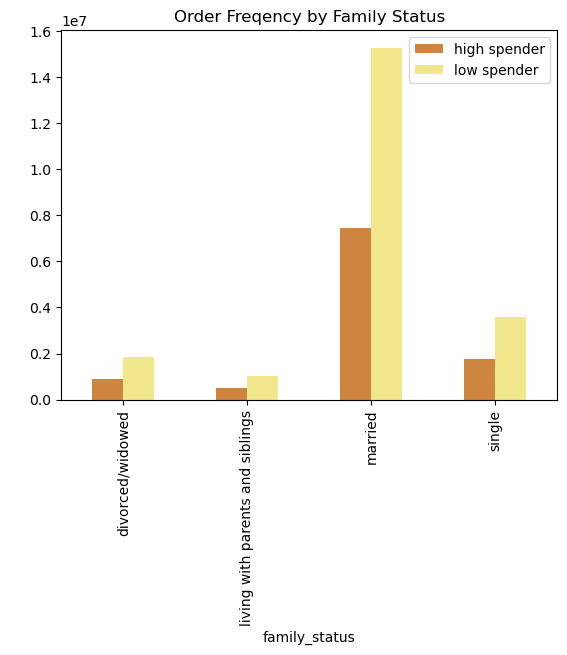

In [124]:
# Group family status  by max order
grouped_counts = customer_habbits.groupby(['family_status', 'spending_flag']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='bar', color = [ 'peru','khaki'])

# Add labels and title
plt.ylabel(' ')
plt.title('Order Freqency by Family Status')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'max_order_by_fam.png')) # Save figure

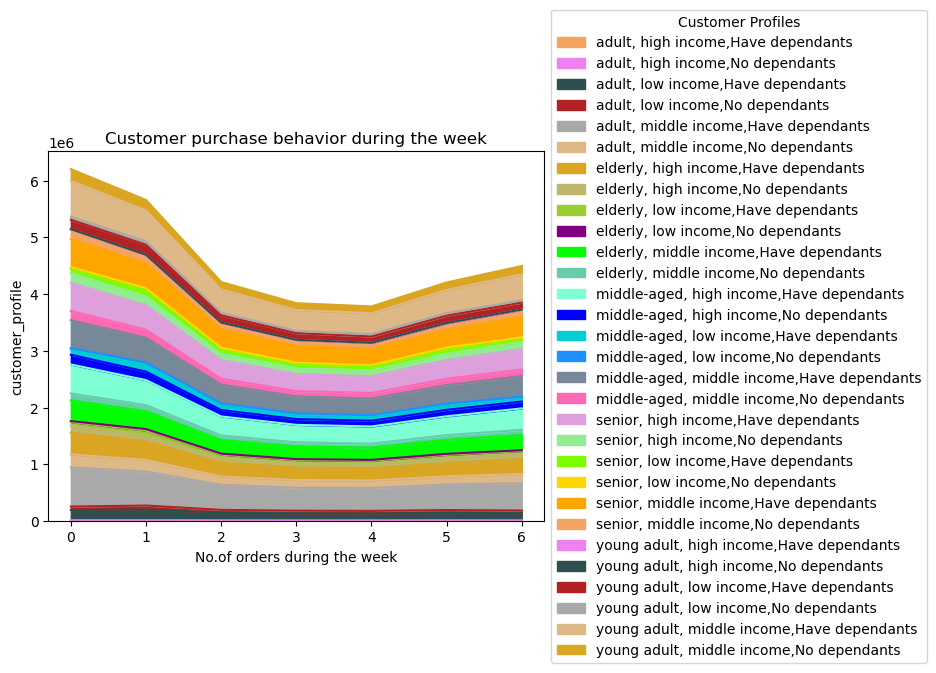

In [126]:
# create a crosstab and store it in crosstab object

crosstab5 = pd.crosstab(df_big['order_day_of_week'], df_big['customer_profile'], dropna = False,margins=False)

# Create a stacked bar chart from crosstab data to visualize Customer purchase behavior 

colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
customer_profile_odw = crosstab5.plot.area(color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_odw.set(xlabel='No.of orders during the week', ylabel='customer_profile', title='Customer purchase behavior during the week')
customer_profile_odw.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save area chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_ordersdayofweek_areaplot.png'),bbox_inches='tight')


In [127]:
# Exporting dataset as pickle format
df_big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_big_final.pkl'))